In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline
    
data_train = pd.read_csv("train.csv",na_values=['?',''],delimiter=',',delim_whitespace=False) # reading data from files
data_test = pd.read_csv("test.csv",na_values=['?',''],delimiter=',',delim_whitespace=False)

print(data_train.shape)

print(data_test.shape)


(1460, 81)
(1459, 80)


In [2]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#checking for null values
print(data_train.columns[data_train.isnull().any()])
print(len(data_train.columns[data_train.isnull().any()]))
print(data_test.columns[data_test.isnull().any()])
print(len(data_test.columns[data_test.isnull().any()]))

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
19
Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')
33


In [4]:
for i in data_train.columns:
    if data_train[i].isnull().any():
        print(i,data_train[i].dtype)      
        

for i in data_test.columns:
    if data_test[i].isnull().any():
        print(i,data_test[i].dtype)   

LotFrontage float64
Alley object
MasVnrType object
MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
FireplaceQu object
GarageType object
GarageYrBlt float64
GarageFinish object
GarageQual object
GarageCond object
PoolQC object
Fence object
MiscFeature object
MSZoning object
LotFrontage float64
Alley object
Utilities object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 float64
BsmtFinType2 object
BsmtFinSF2 float64
BsmtUnfSF float64
TotalBsmtSF float64
BsmtFullBath float64
BsmtHalfBath float64
KitchenQual object
Functional object
FireplaceQu object
GarageType object
GarageYrBlt float64
GarageFinish object
GarageCars float64
GarageArea float64
GarageQual object
GarageCond object
PoolQC object
Fence object
MiscFeature object
SaleType object


In [5]:
numerical_data = data_train.select_dtypes(exclude =['object'])

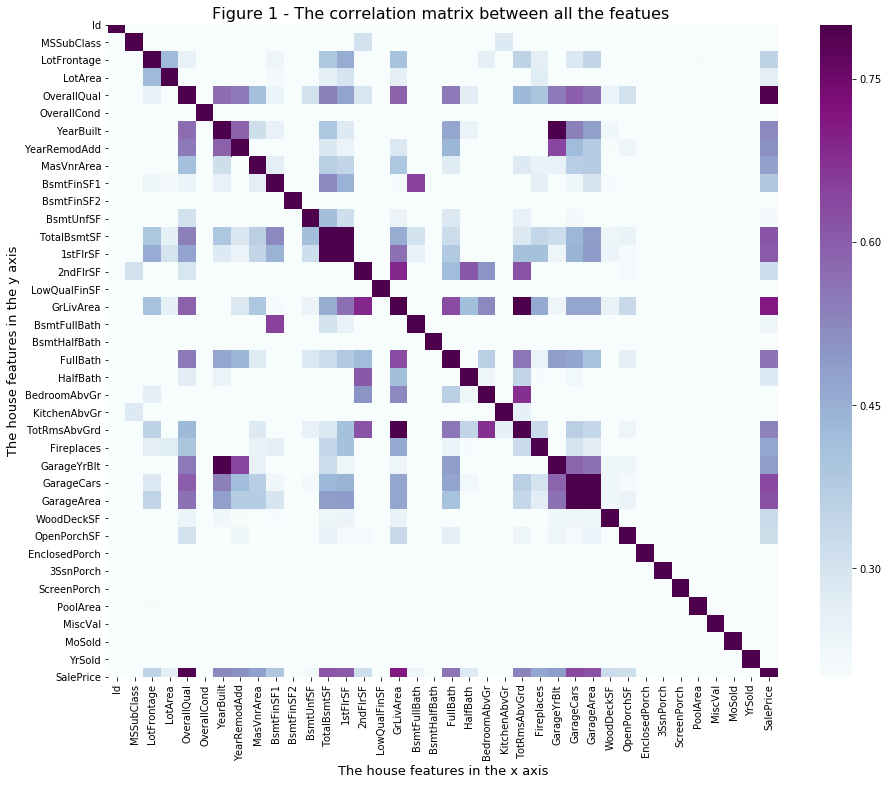

In [6]:
corr_matrix = numerical_data.corr()
f, ax = plt.subplots( figsize=(15, 12))
sns.heatmap(corr_matrix,vmin=0.2, vmax=0.8, square= True, cmap= 'BuPu')
plt.xlabel('The house features in the x axis',fontsize= 13)
plt.ylabel('The house features in the y axis',fontsize= 13)
plt.title('Figure 1 - The correlation matrix between all the featues ', fontsize= 16);


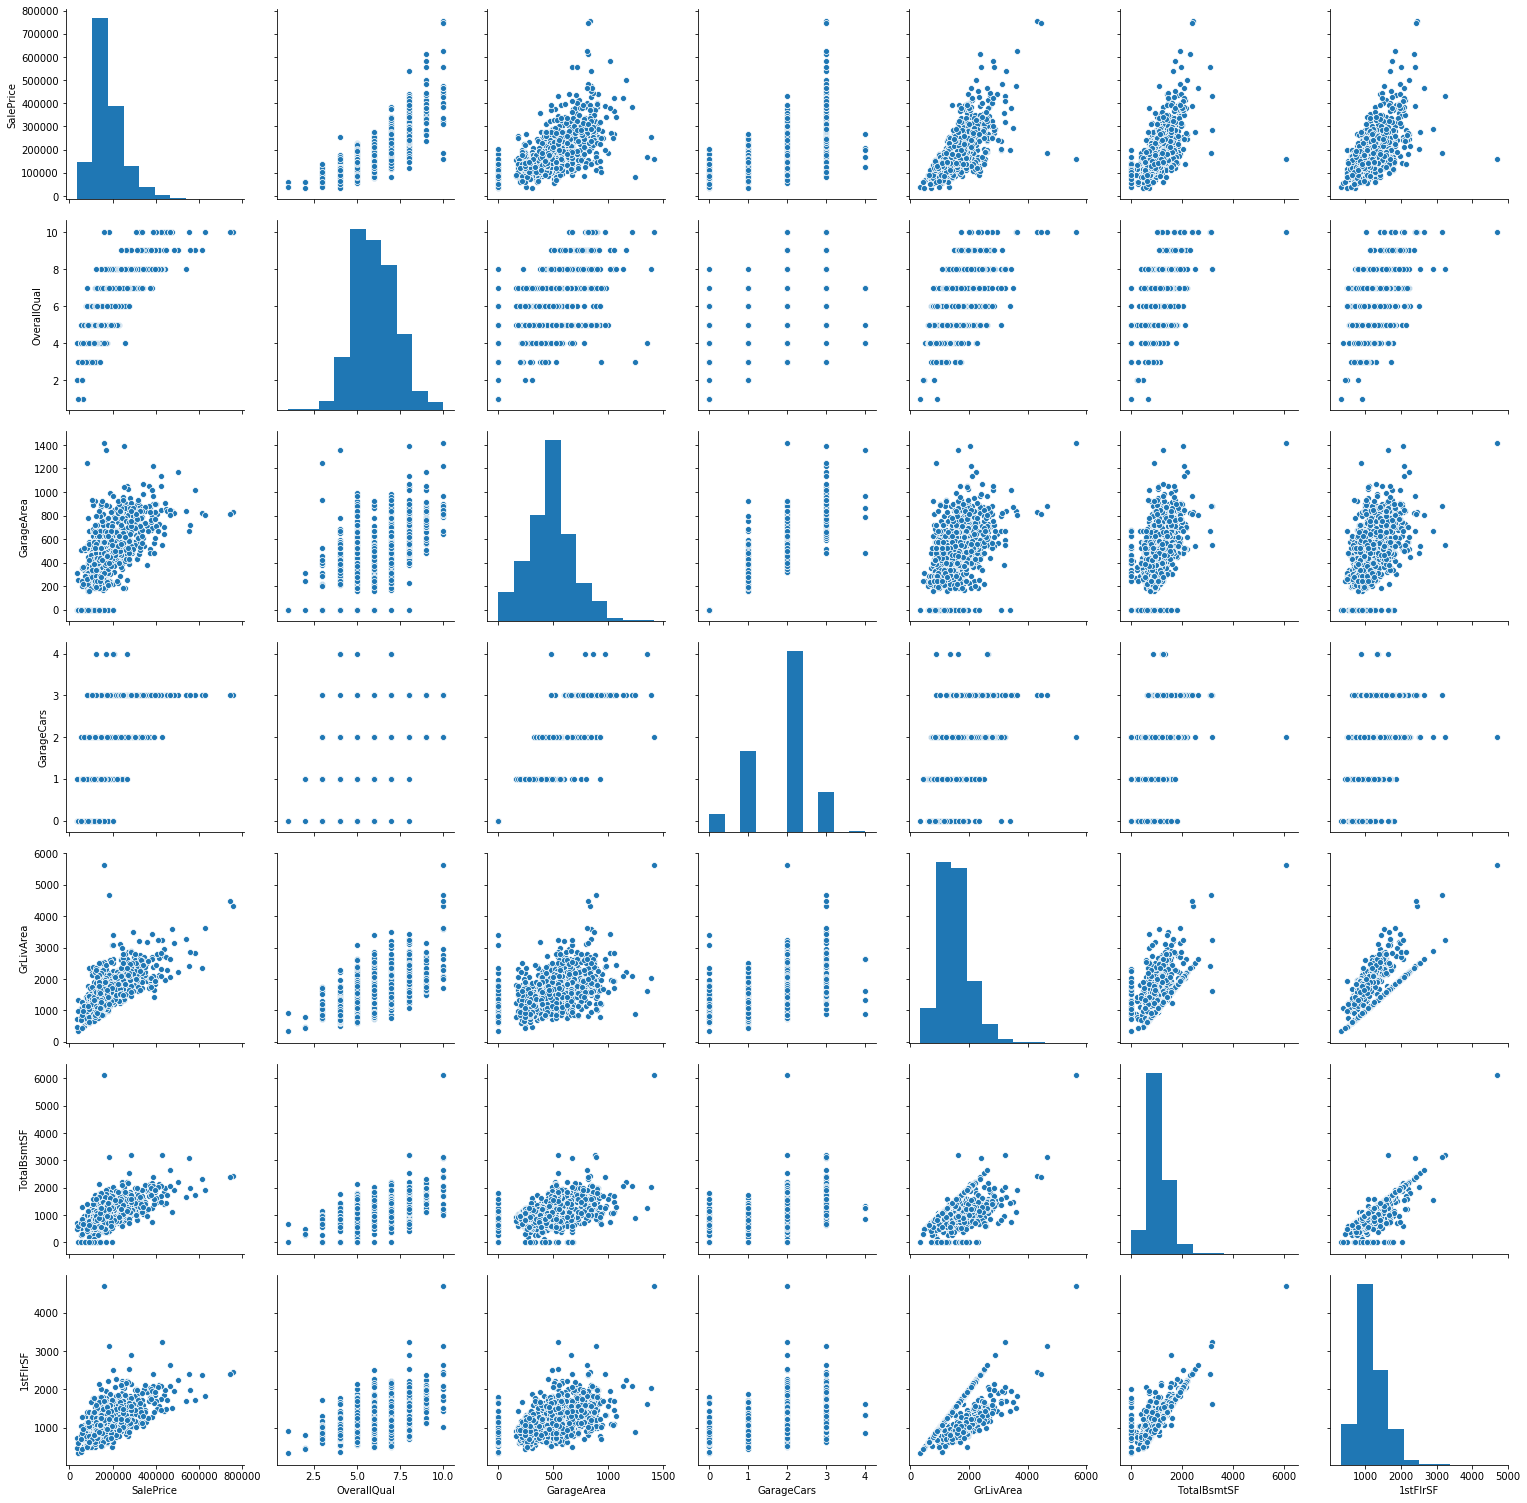

In [7]:
#['OverallQual' 'GarageCars' 'GrLivArea' 'FullBath' 'YearBuilt'
# 'GarageArea' 'TotalBsmtSF' '1stFlrSF' 'KitchenQual' 'BsmtQual']
cols =['SalePrice','OverallQual','GarageArea','GarageCars','GrLivArea','TotalBsmtSF', '1stFlrSF']

sns.pairplot(data_train[cols], size =3)


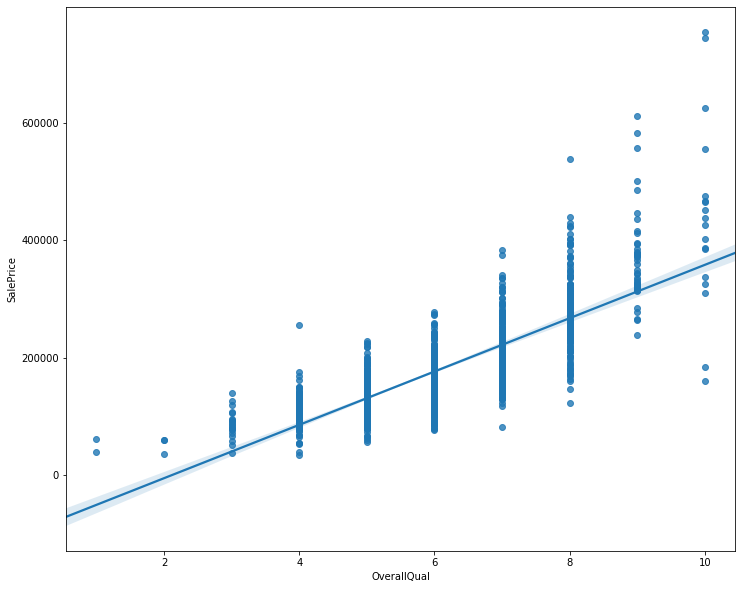

In [8]:
plt.figure(figsize =(12,10));
sns.regplot(x='OverallQual',y='SalePrice',data=data_train)


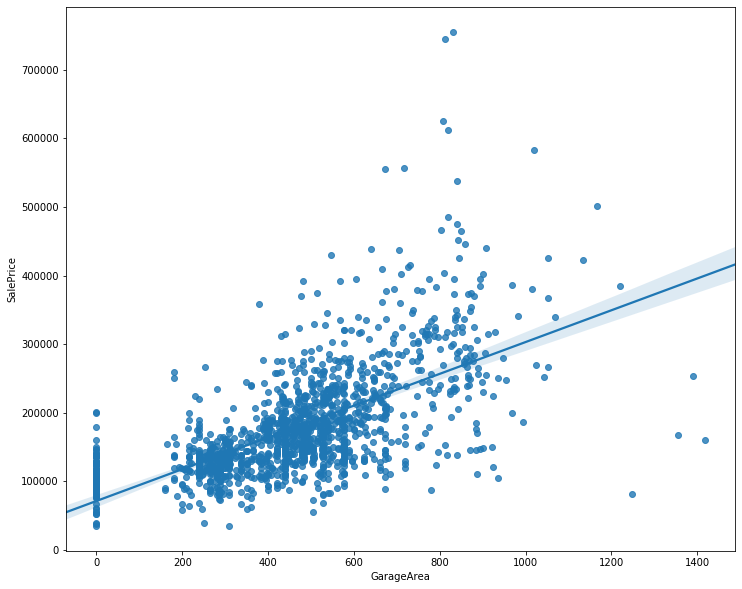

In [9]:
plt.figure(figsize =(12,10));
sns.regplot(x='GarageArea',y='SalePrice',data=data_train)

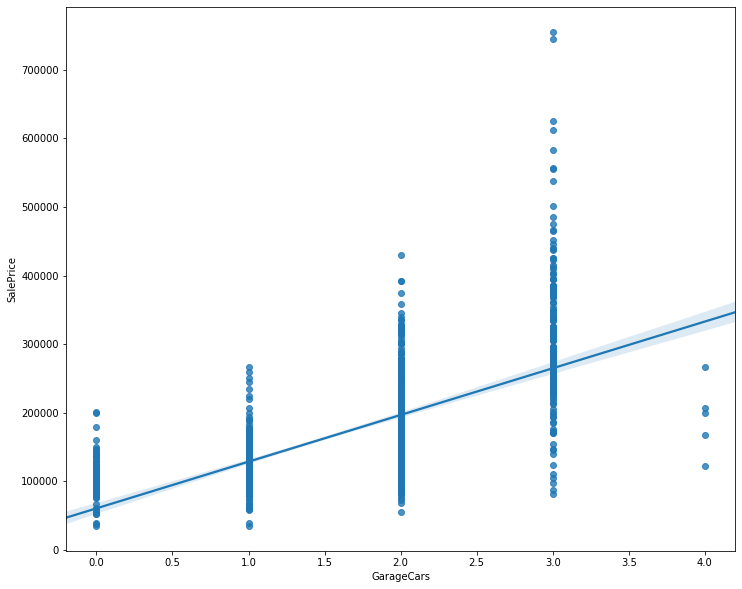

In [10]:
plt.figure(figsize =(12,10));
sns.regplot(x='GarageCars',y='SalePrice',data=data_train)

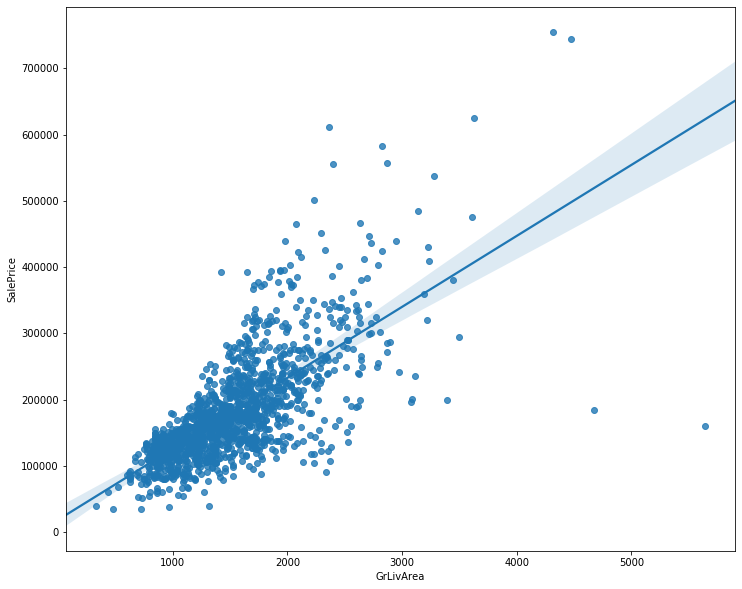

In [11]:
plt.figure(figsize =(12,10));
sns.regplot(x='GrLivArea',y='SalePrice',data=data_train)

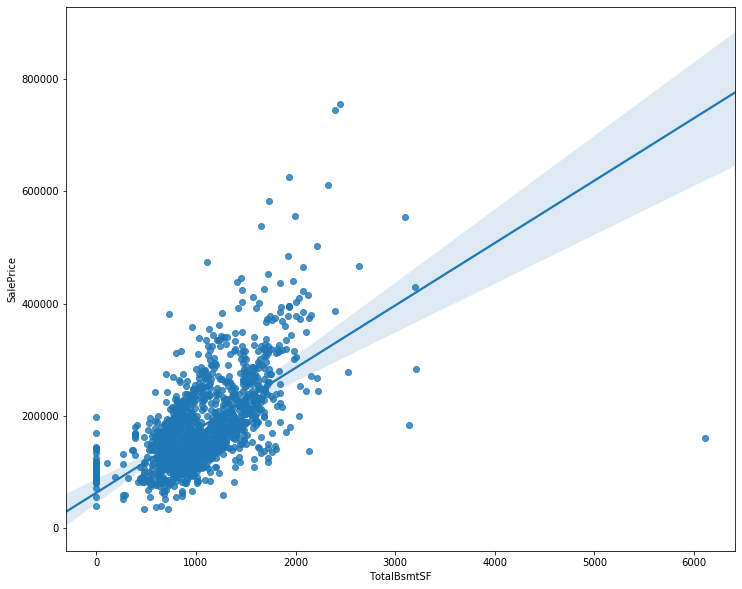

In [12]:
plt.figure(figsize =(12,10));
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=data_train)

In [13]:
g_out = data_train.sort_values(by="GrLivArea", ascending = False).head(2)
g_out

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
data_train.drop([523,1298], inplace = True)
data_train.reset_index(inplace=True)


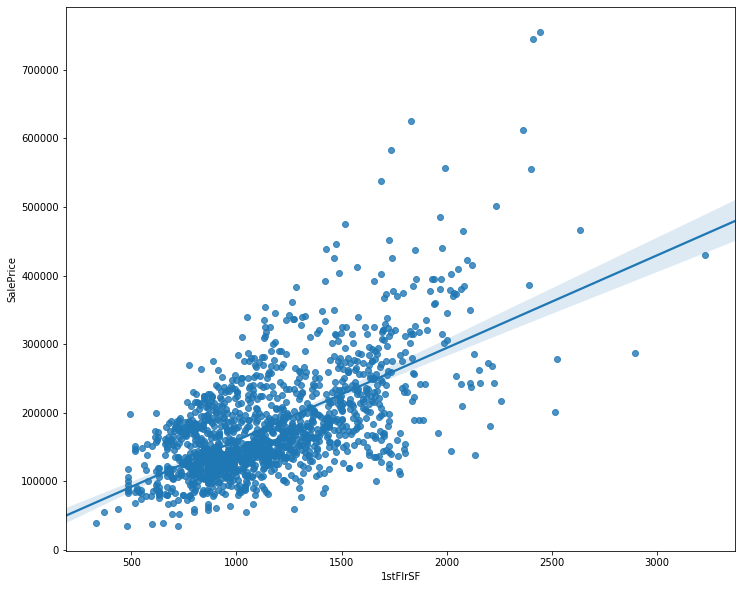

In [15]:
plt.figure(figsize =(12,10));
sns.regplot(x='1stFlrSF',y='SalePrice',data=data_train)

In [16]:
data_train.fillna(method="ffill",inplace=True)
data_test.fillna(method="ffill", inplace=True)

In [17]:
arr=[]
for i in data_train.columns:
    if isinstance(i,object):
        if data_train[i].isnull().any():
            arr.append(i)
            
print(arr)

arr1=[]
for i in data_test.columns:
    if isinstance(i,object):
        if data_test[i].isnull().any():
            arr.append(i)
            
print(arr1)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
[]


In [18]:
for i in arr:
    data_train[i].fillna(inplace=True,value='No')

In [19]:
for i in data_train.columns:
    if isinstance(i,object):
        if data_train[i].isnull().any():
            print(i)

In [20]:
objectdata_train=data_train.select_dtypes(include =['object'])
for i in objectdata_train:
    print(i,data_train[i].unique(),"\t",len(data_train[i].unique()),"\n")

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 	 5 

Street ['Pave' 'Grvl'] 	 2 

Alley ['No' 'Grvl' 'Pave'] 	 3 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 	 4 

LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 	 4 

Utilities ['AllPub' 'NoSeWa'] 	 2 

LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 	 5 

LandSlope ['Gtl' 'Mod' 'Sev'] 	 3 

Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 	 25 

Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 	 9 

Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe'] 	 8 

BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 	 5 

HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 	 8 

RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 	 6 

RoofMatl ['CompShg' 'WdShngl' 'Me

In [21]:
objectdata_train=data_train.select_dtypes(include =['object'])
for i in objectdata_train:
    data_train[i] = data_train[i].factorize()[0]+1
    print(i,np.unique(data_train[i]))

MSZoning [1 2 3 4 5]
Street [1 2]
Alley [1 2 3]
LotShape [1 2 3 4]
LandContour [1 2 3 4]
Utilities [1 2]
LotConfig [1 2 3 4 5]
LandSlope [1 2 3]
Neighborhood [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Condition1 [1 2 3 4 5 6 7 8 9]
Condition2 [1 2 3 4 5 6 7 8]
BldgType [1 2 3 4 5]
HouseStyle [1 2 3 4 5 6 7 8]
RoofStyle [1 2 3 4 5 6]
RoofMatl [1 2 3 4 5 6 7]
Exterior1st [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Exterior2nd [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
MasVnrType [1 2 3 4]
ExterQual [1 2 3 4]
ExterCond [1 2 3 4 5]
Foundation [1 2 3 4 5 6]
BsmtQual [1 2 3 4]
BsmtCond [1 2 3 4]
BsmtExposure [1 2 3 4]
BsmtFinType1 [1 2 3 4 5 6]
BsmtFinType2 [1 2 3 4 5 6]
Heating [1 2 3 4 5 6]
HeatingQC [1 2 3 4 5]
CentralAir [1 2]
Electrical [1 2 3 4 5]
KitchenQual [1 2 3 4]
Functional [1 2 3 4 5 6 7]
FireplaceQu [1 2 3 4 5 6]
GarageType [1 2 3 4 5 6]
GarageFinish [1 2 3]
GarageQual [1 2 3 4 5]
GarageCond [1 2 3 4 5]
PavedDrive [1 2 3]
PoolQC [1 2

In [22]:
objectdata_test=data_test.select_dtypes(include =['object'])
for i in objectdata_test:
    data_test[i] = data_test[i].factorize()[0]+1
    print(i,np.unique(data_test[i]))

MSZoning [1 2 3 4 5]
Street [1 2]
Alley [0 1 2]
LotShape [1 2 3 4]
LandContour [1 2 3 4]
Utilities [1]
LotConfig [1 2 3 4 5]
LandSlope [1 2 3]
Neighborhood [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
Condition1 [1 2 3 4 5 6 7 8 9]
Condition2 [1 2 3 4 5]
BldgType [1 2 3 4 5]
HouseStyle [1 2 3 4 5 6 7]
RoofStyle [1 2 3 4 5 6]
RoofMatl [1 2 3 4]
Exterior1st [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Exterior2nd [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
MasVnrType [1 2 3 4]
ExterQual [1 2 3 4]
ExterCond [1 2 3 4 5]
Foundation [1 2 3 4 5 6]
BsmtQual [1 2 3 4]
BsmtCond [1 2 3 4]
BsmtExposure [1 2 3 4]
BsmtFinType1 [1 2 3 4 5 6]
BsmtFinType2 [1 2 3 4 5 6]
Heating [1 2 3 4]
HeatingQC [1 2 3 4 5]
CentralAir [1 2]
Electrical [1 2 3 4]
KitchenQual [1 2 3 4]
Functional [1 2 3 4 5 6 7]
FireplaceQu [0 1 2 3 4 5]
GarageType [1 2 3 4 5 6]
GarageFinish [1 2 3]
GarageQual [1 2 3 4]
GarageCond [1 2 3 4 5]
PavedDrive [1 2 3]
PoolQC [0 1 2]
Fence [1 2 3 4]
MiscFeature [

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

x_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
print(dfcolumns, dfscores)


                0
0           index
1              Id
2      MSSubClass
3        MSZoning
4     LotFrontage
..            ...
76        MiscVal
77         MoSold
78         YrSold
79       SaleType
80  SaleCondition

[81 rows x 1 columns]            0
0   0.930554
1   0.930554
2   0.873077
3   1.242118
4   1.205007
..       ...
76  3.758886
77  0.946210
78  1.069644
79  1.179386
80  1.467453

[81 rows x 1 columns]


In [24]:
print("\nfeatures \n")

#from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection

x_train = data_train.drop('SalePrice',axis=1)
y_train = data_train['SalePrice']
clf = ExtraTreesRegressor(n_estimators=20)
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(data.index[0], ascending=False).T

print("Features selected with Tree-based selection \n")
yyy = np.asarray((data.columns[0:40]))
xxx = np.asarray((data.iloc[:,0:40]))
print(yyy)
print("\n Relevance of each feature \n")
print(xxx)


features 

Features selected with Tree-based selection 

['OverallQual' 'GarageCars' 'GrLivArea' 'FullBath' '1stFlrSF' 'BsmtQual'
 'YearRemodAdd' 'TotalBsmtSF' 'BsmtFinSF1' 'ExterQual' '2ndFlrSF'
 'Fireplaces' 'TotRmsAbvGrd' 'KitchenQual' 'Foundation' 'BsmtFinType1'
 'CentralAir' 'YearBuilt' 'GarageArea' 'HalfBath' 'BsmtFullBath' 'LotArea'
 'BedroomAbvGr' 'Neighborhood' 'MSZoning' 'WoodDeckSF' 'MasVnrArea'
 'OverallCond' 'LandSlope' 'LotFrontage' 'MSSubClass' 'BldgType'
 'BsmtUnfSF' 'LotShape' 'GarageType' 'GarageFinish' 'RoofStyle'
 'BsmtExposure' 'Id' 'Fence']

 Relevance of each feature 

[[0.34997802 0.13314115 0.10724559 0.0470068  0.02740378 0.02499036
  0.02328841 0.0190916  0.01837795 0.01722437 0.01654118 0.01604112
  0.01559804 0.01433814 0.0138506  0.01132313 0.00763146 0.0074795
  0.00618465 0.00602331 0.0058329  0.00555718 0.00465123 0.00463549
  0.00434069 0.00433629 0.00403439 0.00398022 0.00352523 0.00330056
  0.00322939 0.00287535 0.00281049 0.00270978 0.00266915 0.00

In [25]:
print(yyy)
data_aux = pd.DataFrame(data=x_train, columns=yyy)
data_aut = pd.DataFrame(data=data_test, columns=yyy)
data_aut.isnull().any()
data_aux.to_csv('preprocessedTestData.csv', index=False)

['OverallQual' 'GarageCars' 'GrLivArea' 'FullBath' '1stFlrSF' 'BsmtQual'
 'YearRemodAdd' 'TotalBsmtSF' 'BsmtFinSF1' 'ExterQual' '2ndFlrSF'
 'Fireplaces' 'TotRmsAbvGrd' 'KitchenQual' 'Foundation' 'BsmtFinType1'
 'CentralAir' 'YearBuilt' 'GarageArea' 'HalfBath' 'BsmtFullBath' 'LotArea'
 'BedroomAbvGr' 'Neighborhood' 'MSZoning' 'WoodDeckSF' 'MasVnrArea'
 'OverallCond' 'LandSlope' 'LotFrontage' 'MSSubClass' 'BldgType'
 'BsmtUnfSF' 'LotShape' 'GarageType' 'GarageFinish' 'RoofStyle'
 'BsmtExposure' 'Id' 'Fence']


In [26]:
data_aux["SalePrice"] = y_train
data_aux.to_csv('preprocessedTestData.csv', index=False)

In [27]:
data_aut

,OverallQual,GarageCars,GrLivArea,FullBath,1stFlrSF,BsmtQual,YearRemodAdd,TotalBsmtSF,BsmtFinSF1,ExterQual,...,MSSubClass,BldgType,BsmtUnfSF,LotShape,GarageType,GarageFinish,RoofStyle,BsmtExposure,Id,Fence
0,5,1.0,896,1,896,1,1961,882.0,468.0,1,...,20,1,270.0,1,1,1,1,1,1461,1
1,6,1.0,1329,1,1329,1,1958,1329.0,923.0,1,...,20,1,406.0,2,1,1,2,1,1462,1
2,5,2.0,1629,2,928,2,1998,928.0,791.0,1,...,60,1,137.0,2,1,2,1,1,1463,1
3,6,2.0,1604,2,926,1,1998,926.0,602.0,1,...,60,1,324.0,2,1,2,1,1,1464,1
4,8,2.0,1280,2,1280,2,1992,1280.0,263.0,2,...,120,2,1017.0,2,1,3,1,1,1465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,0.0,1092,1,546,1,1970,546.0,0.0,1,...,160,3,546.0,1,6,1,1,1,2915,2
1455,4,1.0,1092,1,546,1,1970,546.0,252.0,1,...,160,2,294.0,1,6,1,1,1,2916,2
1456,5,2.0,1224,1,1224,1,1996,1224.0,1224.0,1,...,20,1,0.0,1,2,1,1,1,2917,2
1457,5,0.0,970,1,970,2,1992,912.0,337.0,1,...,85,1,575.0,1,2,1,1,4,2918,1


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm

scale = preprocessing.StandardScaler()
data_aux = scale.fit_transform(data_aux)

linear1 = LinearRegression().fit(data_aux, data_train['SalePrice'])
print(linear1.coef_)
linear1.intercept_


[-3.09076887e-11 -1.45519152e-11  1.14596332e-10  4.18367563e-11
  8.18545232e-12 -9.09494702e-12 -2.72848411e-12 -1.54614099e-11
  2.54658516e-11  1.04591891e-11 -1.72803993e-11  1.45519152e-11
  9.09494702e-13 -9.09494702e-12 -1.18234311e-11  5.00222086e-12
  1.59161573e-11  6.27551344e-11  1.72803993e-11  2.27373675e-12
  6.82121026e-12  1.19371180e-11 -2.95585778e-12  9.09494702e-12
 -1.98951966e-13 -1.36424205e-12  3.63797881e-12  3.86535248e-12
  1.50066626e-11  2.27373675e-12 -1.47224455e-11  3.78008735e-12
  4.27462510e-11  1.63709046e-11 -2.06910045e-11  3.41060513e-13
  8.98126018e-12  3.86535248e-12  7.73070497e-12  9.43600753e-12
  7.94677889e+04]


180932.91906721535

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
from sklearn   import metrics
score = np.sqrt(metrics.mean_squared_error(y_train,linear1.predict(data_aux)))
print(score)

1.51285071961799e-10


In [31]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453    175000
1454    210000
1455    266500
1456    142125
1457    147500
Name: SalePrice, Length: 1458, dtype: int64

In [32]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing


#x_train = data_aux.drop('SalePrice',axis=1).values
#y_train = data_aux['SalePrice'].values
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("Linear Regression \n")

#Cross validation
classifierLinearRegression = LinearRegression(fit_intercept=True, normalize=False,
                                              copy_X=True, n_jobs=1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(data_aux)
    x_test_fold = scaler.transform(data_aux)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
r2 = metrics.r2_score(cv_y,cv_pred)
print("  R2 error: {}".format(r2))

Linear Regression 


 Average RMSE: 1.2013727580480535e-10
  R2 error: 1.0


In [33]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("RandomForest \n")

#Cross validation
classifierRandomFprest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(data_aux)
    x_test_fold = scaler.transform(data_aux)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierRandomFprest = classifierRandomFprest.fit(x_train_fold, y_train_fold)
    pred = classifierRandomFprest.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score)) 
r2 = metrics.r2_score(cv_y,cv_pred)
print("R2 error: {}".format(r2))


RandomForest 


 Average RMSE: 1733.1779793647868
R2 error: 0.9995243318575013


In [34]:
from sklearn.svm import SVR


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split

print("SVM\n")

#Cross validation
classifierSVM = SVR(kernel = 'linear', gamma='auto', coef0=0.0, tol=0.001)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(data_aux)
    x_test_fold = scaler.transform(data_aux)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierSVM = classifierSVM.fit(x_train_fold, y_train_fold)
    pred = classifierRandomFprest.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
r2 = metrics.r2_score(cv_y,cv_pred)
print(" R2 error: {}".format(r2))

SVM


 Average RMSE: 1733.1779793647868
 R2 error: 0.9995243318575013


In [35]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("RandomForest \n")

#Cross validation
classifierRandomFprest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1,
                min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                oob_score=False, n_jobs=1, random_state=0, verbose=0, warm_start=False)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(data_aux)
    x_test_fold = scaler.transform(data_aux)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierRandomFprest = classifierRandomFprest.fit(x_train_fold, y_train_fold)
    pred = classifierRandomFprest.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score)) 
r2 = metrics.r2_score(cv_y,cv_pred)
print("R2 error: {}".format(r2))


RandomForest 


 Average RMSE: 1733.1779793647868
R2 error: 0.9995243318575013


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("Gradient Boosting \n")

#Cross validation
classifierGradientBoost = GradientBoostingRegressor(n_estimators=500)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(data_aux)
    x_test_fold = scaler.transform(data_aux)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierGradientBoost = classifierGradientBoost.fit(x_train_fold, y_train_fold)
    pred = classifierRandomFprest.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score)) 
r2 = metrics.r2_score(cv_y,cv_pred)
print("R2 error: {}".format(r2))


Gradient Boosting 


 Average RMSE: 1733.1779793647868
R2 error: 0.9995243318575013
